In [135]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv("train.csv")
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df.shape

(42000, 785)

In [138]:
label = df["label"]
col = df.columns
col = col.delete(0)
img = df[col]
a = [x for x in range(784)]
b = np.reshape(a,(28,28))
print(np.array(a).shape)
lst_img = []
for x in range(img.shape[0]):
    a = np.array(img.iloc[x])
    img_s = np.reshape(a,(28,28))
    lst_img.append(img_s)

(784,)


In [139]:
lst_img = np.array(lst_img)

In [140]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,activation="relu", input_shape = (28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 10),
    tf.keras.layers.Dense(units=1)
])

In [141]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
    tf.keras.layers.Dense(1)
])

In [142]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.mean_absolute_error,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)

In [143]:
print(df.shape)

(42000, 785)


In [144]:
col

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [145]:
x_model_2 = []
img = df[col]
for x in range(img.shape[0]):
    x_model_2.append(img.iloc[x])

In [146]:
x_model_2 = np.array(x_model_2)

In [147]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [148]:
print(lst_img.shape,label.shape)

(42000, 28, 28) (42000,)


In [149]:
model_2.fit(x_model_2,label, batch_size=100, epochs=100)

Epoch 1/100
420/420 [==============================] - 2s 3ms/step - loss: 3.5852 - sparse_categorical_accuracy: 0.0984
Epoch 2/100
420/420 [==============================] - 2s 4ms/step - loss: 3.1142 - sparse_categorical_accuracy: 0.0984
Epoch 3/100
420/420 [==============================] - 2s 4ms/step - loss: 2.7912 - sparse_categorical_accuracy: 0.0984
Epoch 4/100
420/420 [==============================] - 1s 3ms/step - loss: 2.5405 - sparse_categorical_accuracy: 0.0984
Epoch 5/100
420/420 [==============================] - 2s 4ms/step - loss: 2.4826 - sparse_categorical_accuracy: 0.0984
Epoch 6/100
420/420 [==============================] - 1s 3ms/step - loss: 2.4290 - sparse_categorical_accuracy: 0.0984
Epoch 7/100
420/420 [==============================] - 1s 3ms/step - loss: 2.2801 - sparse_categorical_accuracy: 0.0984
Epoch 8/100
420/420 [==============================] - 1s 4ms/step - loss: 2.2345 - sparse_categorical_accuracy: 0.0984
Epoch 9/100
420/420 [===================

In [150]:
model.fit(lst_img,label,batch_size=20, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 31s 15ms/step - loss: 503.7318
Epoch 2/10
2100/2100 [==============================] - 30s 14ms/step - loss: 12.1818
Epoch 3/10
2100/2100 [==============================] - 30s 14ms/step - loss: 3.9020
Epoch 4/10
2100/2100 [==============================] - 31s 15ms/step - loss: 2.1372
Epoch 5/10
2100/2100 [==============================] - 30s 15ms/step - loss: 1.8235
Epoch 6/10
2100/2100 [==============================] - 31s 15ms/step - loss: 1.7911
Epoch 7/10
2100/2100 [==============================] - 30s 15ms/step - loss: 1.8490
Epoch 8/10
2100/2100 [==============================] - 31s 15ms/step - loss: 1.8254
Epoch 9/10
2100/2100 [==============================] - 31s 15ms/step - loss: 1.6821
Epoch 10/10
2100/2100 [==============================] - 31s 15ms/step - loss: 1.5461


In [151]:
df = pd.read_csv("test.csv")

In [152]:

col = df.columns

img = df[col]
a = [x for x in range(784)]
b = np.reshape(a,(28,28))
print(np.array(a).shape)
lst_img = []
for x in range(img.shape[0]):
    a = np.array(img.iloc[x])
    img_s = np.reshape(a,(28,28))
    lst_img.append(img_s)

(784,)


In [153]:
lst_img = np.array(lst_img)

In [154]:
y_pre = model.predict(lst_img)

875/875 [==============================] - 5s 6ms/step


In [155]:
df = pd.read_csv("test.csv")

In [156]:
x_model_2 = []
img = df[col]
for x in range(img.shape[0]):
    x_model_2.append(img.iloc[x])

x_model_2 = np.array(x_model_2)

In [157]:
y_pre = model_2.predict(x_model_2)

875/875 [==============================] - 2s 2ms/step


In [158]:
for x in y_pre:
    x[0] = round(x[0])
    if x[0] < 0:
        x[0] = 0

In [159]:
y_pre = y_pre.astype(int)

In [160]:
print(y_pre)

[[1]
 [1]
 [6]
 ...
 [3]
 [6]
 [1]]


[3]


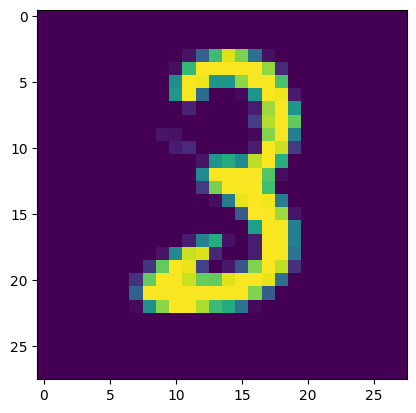

In [161]:
plt.imshow(lst_img[4])
print(y_pre[4])

In [162]:
ind = [x + 1 for x in range(len(y_pre))]

In [163]:
print(np.array(ind).shape,y_pre.shape)

(28000,) (28000, 1)


In [164]:
df = pd.DataFrame({"ImageId" : ind, "Label" : np.reshape(y_pre, (y_pre.shape[0]))})

In [165]:
df

,ImageId,Label
0,1,1
1,2,1
2,3,6
3,4,6
4,5,3
...,...,...
27995,27996,6
27996,27997,6
27997,27998,3
27998,27999,6


In [166]:
df.to_csv("submission.csv", index=False)